In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import random
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures

On importe nos données.

In [86]:
# Pensez à fixer le hasard grâce à seeds et des random states.
random.seed(42)


df = pd.read_csv('donnee_nettoye.csv')


In [87]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Question n°1
Commence par faire un dummy modèle pour avoir un point de comparaison.

In [88]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)




-0.008391982350864469

Question n°2
Étant donné que la variable à prédire est continue, c’est un problème de régression. Je vous conseille d’utiliser les algorithmes suivants : régression linéaire, Lasso, Ridge et ElasticNet. Sklearn dispose d’implémentation pour chacun de ses modèles. Comparer vos modèles à l'aide du R2 et du RMSE.

Modele LinearRegression

Sans modifier les données , voici le résultat

In [89]:
# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test)
# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

Le score du modèle sur l'ensemble de test est : 0.81


In [90]:

# Créer un objet PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Créer un pipeline qui applique d'abord les features polynomiales, puis entraîne le modèle
pipeline = Pipeline([("poly_features", poly_features), ("model", model)])

# Entraîner le modèle en utilisant les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = pipeline.predict(X_test)

# Évaluer les performances du modèle sur l'ensemble de test
score = pipeline.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.88


In [91]:
# create a pipeline with StandardScaler and LinearRegression steps
pipe = make_pipeline(StandardScaler(), LinearRegression())

# define the parameter values that should be searched
param_grid = {
    'linearregression__fit_intercept': [True, False],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'linearregression__fit_intercept': True}
Test performance = 0.81


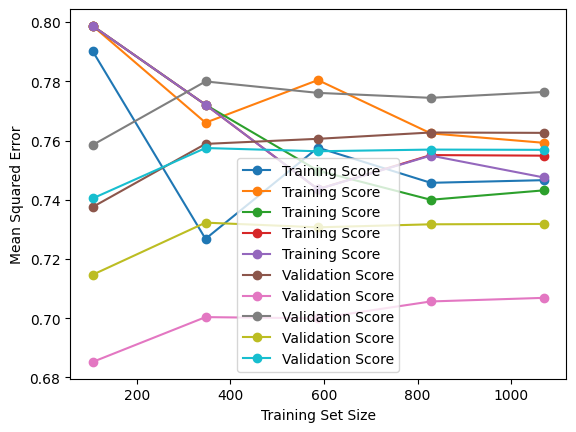

In [92]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
pipe = make_pipeline(StandardScaler(), LinearRegression())

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

score 

# Generate the training set sizes and training/validation scores
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, train_scores, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores, 'o-', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

In [93]:

scores = cross_validate(model, X, y, cv=5)
scores
#Faire une moyenne

{'fit_time': array([0.00440955, 0.00275278, 0.00244117, 0.00254774, 0.00245214]),
 'score_time': array([0.00151348, 0.00140572, 0.00153947, 0.00136113, 0.0013485 ]),
 'test_score': array([0.76258417, 0.70684884, 0.77618995, 0.7319327 , 0.75696472])}

899      892.806271
1063     119.276447
1255    3114.725515
298     6800.365035
237     4532.926473
           ...     
534     2960.287038
542     1437.690704
759     2123.339683
1283    8855.760842
1284     568.422169
Name: charges, Length: 268, dtype: float64


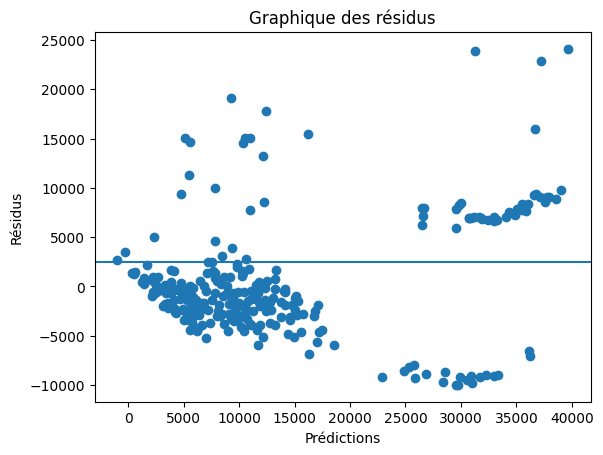

In [94]:
# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = (y_test - y_pred).abs()

# print the residues
print(residues)
# Prédictions de la régression
predictions = model.predict(X_test)

# Calcul des résidus
residuals = y_test - predictions

# Affichage du graphique des résidus
plt.scatter(predictions, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=residues.median())
plt.title('Graphique des résidus')
plt.show()

9542111609.792513


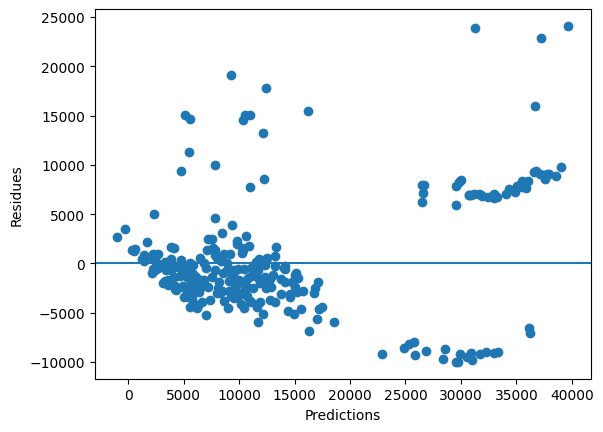

SSR = 9542111609.79
[0.76258417 0.70684884 0.77618995 0.7319327  0.75696472]
Moyenne des scores : 0.75


In [95]:
# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# calculate the sum of squared residues
ssr = np.sum(residues ** 2)

# print the sum of squared residues
print(ssr)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# calculate the sum of squared residues
ssr = np.sum(residues ** 2)

# create a scatter plot of the residues
plt.scatter(y_pred, residues)
plt.xlabel('Predictions')
plt.axhline(y=0)
plt.ylabel('Residues')
plt.show()

# print the sum of squared residues
print(f"SSR = {ssr:.2f}")


# Utilisation de la fonction cross_val_score pour effectuer un test de cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Affichage des scores
print(scores)

# Calcul de la moyenne des scores
mean_score = np.mean(scores)

print(f"Moyenne des scores : {mean_score:.2f}")

-3.4294775002912827e-07


<AxesSubplot: xlabel='predictions', ylabel='y_train'>

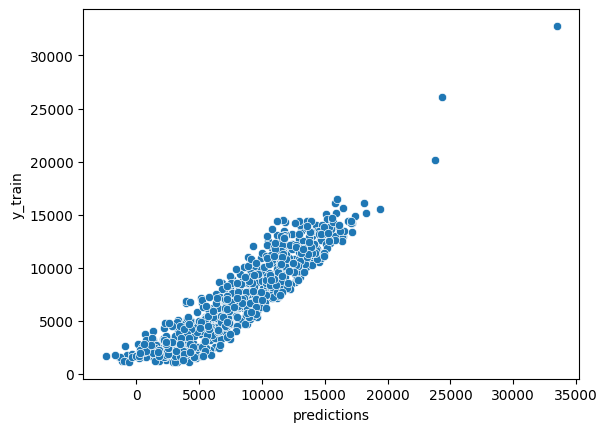

In [96]:

# Séparation des données en matrices X et y
X = df.drop(columns='charges')
y = df['charges']

# Entraînement d'un modèle de forêt aléatoire
model = LinearRegression()
model.fit(X, y)

# Faire des prédictions sur les données de test
predictions = model.predict(X_train)

# Calculer la distance de Cook pour évaluer la qualité des prédictions
cook_distance = (y_train - predictions).mean() / (y_train.var() + predictions.var())

print(cook_distance)
# Calcul des résidus du modèle
residuals = (y_train - predictions).abs()

# Calcul de la distance de Cook pour chaque résidu
cook_distances = np.abs(residuals) / (y_train.var() + predictions.var())

# Seuil de distance de Cook à partir duquel un résidu est considéré comme suspect
threshold = cook_distances.mean()

# Filtrage des résidus suspects
filtered_residuals = residuals[cook_distances < threshold]

# Calcul de la moyenne et de la variance des résidus filtrés
mean_filtered_residuals = filtered_residuals.mean()
var_filtered_residuals = filtered_residuals.var()


# Création d'un dataframe avec les prédictions et les valeurs réelles pour les résidus filtrés
df_cook = pd.DataFrame({'predictions': predictions[cook_distances < threshold], 'y_train': y_train[cook_distances < threshold]})

# Affichage d'un nuage de points entre les prédictions et les valeurs réelles pour les résidus filtrés
sns.scatterplot(data=df_cook, x='predictions', y='y_train')

<AxesSubplot: xlabel='charges', ylabel='Count'>

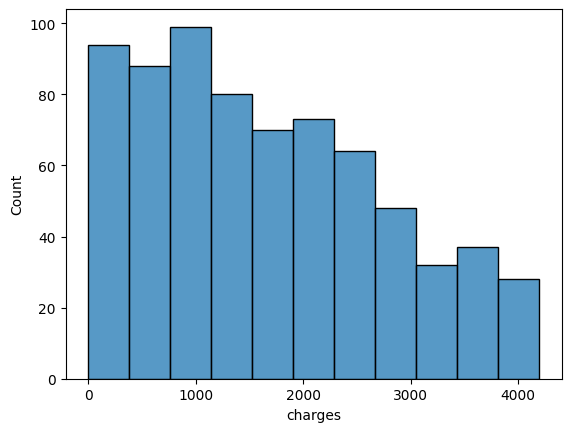

In [97]:
# Affichage d'un histogramme des résidus filtrés
sns.histplot(filtered_residuals)

In [98]:
filtered_residuals

1113     661.061220
967      707.081839
170     3722.899944
275       49.706950
1140    2361.459694
           ...     
466      278.285908
121     1511.086425
1294    1678.159682
860      843.590547
1126    3270.475577
Name: charges, Length: 713, dtype: float64

In [99]:
X_train_new = X_train.drop(filtered_residuals.index)
Y_train_new = y_train.drop(filtered_residuals.index)

In [100]:
X_train_new

,age,sex,bmi,children,smoker,region
598,52,1,37.525,2,1,3
209,40,0,41.230,1,1,2
140,34,0,22.420,2,1,2
660,57,1,23.980,1,1,0
1239,52,0,41.800,2,0,0
...,...,...,...,...,...,...
330,61,1,36.385,1,0,2
1238,25,1,42.130,1,1,0
1044,43,1,24.700,2,0,3
1095,51,1,34.960,2,0,2


In [101]:
Y_train_new

598     33471.97189
209      6610.10970
140     27375.90478
660     22192.43711
1239    47269.85400
           ...     
330     48517.56315
1238     3238.43570
1044    21880.82000
1095    44641.19740
1130     3693.42800
Name: charges, Length: 356, dtype: float64

899    -3772.698540
1063   -4939.093271
1255   -8780.056381
298     6470.729159
237    -9657.796583
           ...     
534    -8096.789309
542    -6665.521780
759    -7782.268116
1283    8869.656875
1284   -4509.844220
Name: charges, Length: 268, dtype: float64


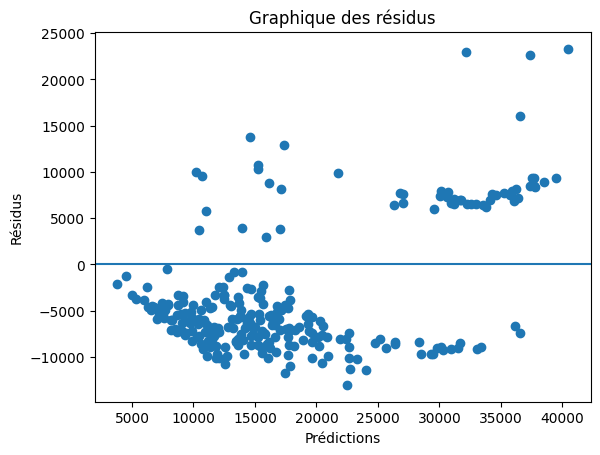

0.681657773138816

In [102]:
# fit the model to the training data
model.fit(X_train_new, Y_train_new)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# print the residues
print(residues)
# Prédictions de la régression
predictions = model.predict(X_test)

# Calcul des résidus
residuals = y_test - predictions

# Affichage du graphique des résidus
plt.scatter(predictions, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0)
plt.title('Graphique des résidus')
plt.show()


# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

score 

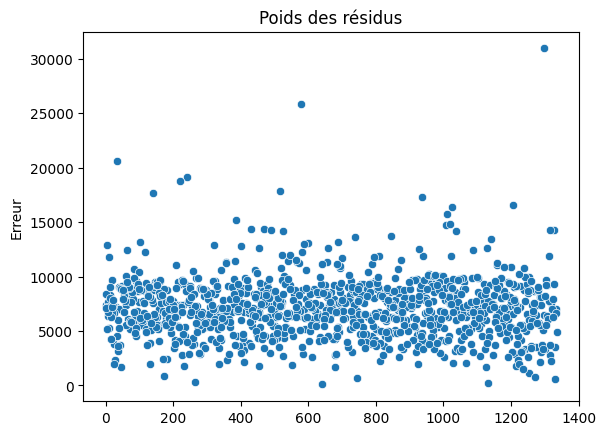

0.7258105376727813

In [109]:
y_pred = model.predict(X_train)

residual = (y_train - y_pred).abs()

sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()

# Utilisation de la fonction cross_val_score pour effectuer un test de cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5).mean()
scores
